In [3]:
cd ..

/home/luke/projects/CS6140-MatchingPursuit


In [4]:
%load_ext autoreload
%autoreload 2

In [16]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *
from utils.metrics import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.display import HTML


In [17]:
num_frames = 25

images = loadVideo("dataset/2011_09_26", num_frames)

In [18]:
images = cropImages(images)

print("Num images: ", len(images))
print("Cropped Image size: ", np.shape(images[0]))

Num images:  114
Cropped Image size:  (200, 200)


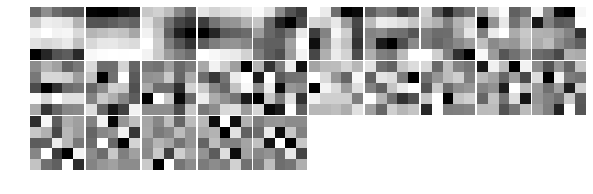

In [19]:
# Generate a Dictionary
patch_size = 5
num_samples = 100
num_features = 25

pca_features = generatePCADictionary(images, patch_size, num_samples, num_features)
# optsparse_features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)
# kmeans_features = generateKMeansDictionary(images, patch_size, num_samples, num_features)

plotDictionary(pca_features, "PCA")
# plotDictionary(optsparse_features, "OptSparse")
# plotDictionary(kmeans_features, "KMeans")

In [20]:
# Experiment 1: Run through video for fixed k and see differences
k = 800

# Test all dicts
_, video_recon_greedy = videoMatchingPursuit(images, pca_features, k, greedyMatchingPursuit)
_, video_recon_orth = videoMatchingPursuit(images, pca_features, k, orthogonalMatchingPursuit)
_, video_recon_conv = videoMatchingPursuit(images, pca_features, k, convolutionalMatchingPursuit)

Number of frames:  114


Number of frames:  114


Number of frames:  114


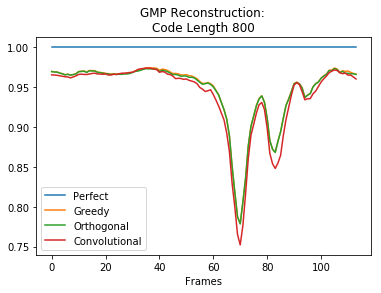

In [25]:
# Plot the loss as a function of time
recon_loss_greedy = videoLoss(images, video_recon_greedy, reconstructionRatio)
recon_loss_orth = videoLoss(images, video_recon_orth, reconstructionRatio)
recon_loss_conv = videoLoss(images, video_recon_conv, reconstructionRatio)

plt.plot(np.ones(len(images)), label="Perfect")
plt.plot(recon_loss_greedy, label="Greedy")
plt.plot(recon_loss_orth, label="Orthogonal")
plt.plot(recon_loss_conv, label="Convolutional")

plt.xlabel("Frames")
plt.legend()
plt.title("GMP Reconstruction: \nCode Length {}".format(k))
plt.savefig("results/GMP_all_algos_loss.png")
plt.show()

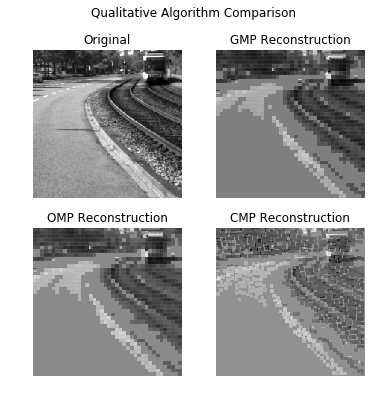

In [31]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(6,6))
plt.suptitle("Qualitative Algorithm Comparison")
ax1.set_title("Original")
ax2.set_title("GMP Reconstruction")
ax3.set_title("OMP Reconstruction")
ax4.set_title("CMP Reconstruction")

im1 = ax1.imshow(images[0], cmap="Greys_r", animated=True)
im2 = ax2.imshow(video_recon_greedy[0], cmap="Greys_r", animated=True)
im3 = ax3.imshow(video_recon_orth[0], cmap="Greys_r", animated=True)
im4 = ax4.imshow(video_recon_conv[0], cmap="Greys_r", animated=True)

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")
plt.savefig("results/GMP_algo_comparision.png")

ValueError: Invalid file object: <_io.BufferedReader name=55>

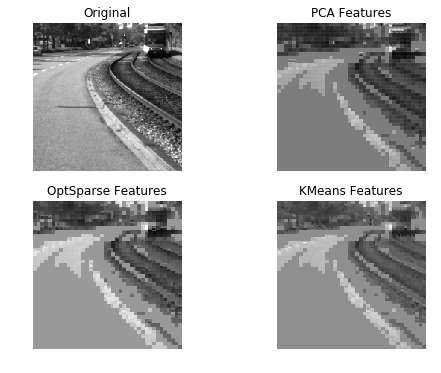

In [16]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,6))
ims = []

ax1.set_title("Original")
ax2.set_title("PCA Features")
ax3.set_title("OptSparse Features")
ax4.set_title("KMeans Features")
for i in range((len(images))):
    im1 = ax1.imshow(images[i], cmap="Greys_r", animated=True)
    im2 = ax2.imshow(video_recon_pca[i], cmap="Greys_r", animated=True)
    im3 = ax3.imshow(video_recon_optsparse[i], cmap="Greys_r", animated=True)
    im4 = ax4.imshow(video_recon_kmeans[i], cmap="Greys_r", animated=True)

    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")
    ax4.axis("off")
    ims.append([im1, im2, im3, im4])
    
ani = animation.ArtistAnimation(f, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())
ani.save('results/GMP_all_dicts_k_{}.gif'.format(k), writer='imagemagick', fps=30)

In [24]:
# Experiment 2: Single image, plot loss against k
K = list(range(20, 800))

recon_img_greedy = np.zeros((len(K), images[0].shape[0], images[0].shape[1]))
recon_img_orth = np.copy(recon_img_greedy)
recon_img_conv = np.copy(recon_img_greedy)

for i in tqdm(range(len(K))):
    _, recon_img_greedy[i] = greedyMatchingPursuit(images[0], pca_features, K[i])
    _, recon_img_orth[i] = orthogonalMatchingPursuit(images[0], pca_features, K[i])
    _, recon_img_conv[i] = convolutionalMatchingPursuit(images[0], pca_features, K[i])



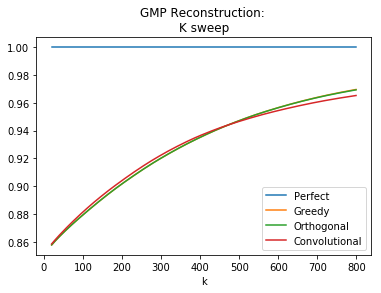

In [27]:
# Plot the loss as a function of time
loss_greedy = np.zeros(len(K))
loss_orth = np.copy(loss_pca)
loss_conv = np.copy(loss_pca)
for i in range(len(K)):
    loss_greedy[i] = reconstructionRatio(images[0], recon_img_greedy[i])
    loss_orth[i] = reconstructionRatio(images[0], recon_img_orth[i])
    loss_conv[i] = reconstructionRatio(images[0], recon_img_conv[i])
    
plt.plot(K,np.ones(len(K)), label="Perfect")
plt.plot(K,loss_greedy, label="Greedy")
plt.plot(K,loss_orth, label="Orthogonal")
plt.plot(K,loss_conv, label="Convolutional")

plt.xlabel("k")
plt.legend()
plt.title("GMP Reconstruction: \nK sweep")
plt.savefig("results/GMP_k_sweep_algos_loss.png")
plt.show()